In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv('toy_data.csv')
data['year_month'] = pd.to_datetime(data['year_month'])
data['year'] = data['year_month'].dt.year
data['month'] = data['year_month'].dt.month
data.head()

,observation_id,year_month,salinity_surface,year,month
0,1,2008-01-01,38.736557,2008,1
1,1,2008-02-01,38.555202,2008,2
2,1,2008-03-01,38.459328,2008,3
3,1,2008-04-01,38.455210,2008,4
4,1,2008-05-01,38.541664,2008,5


For time series data, the obvious graph to start with is a time plot. That is, the observations are plotted against the time of observation, with consecutive observations joined by straight lines. 

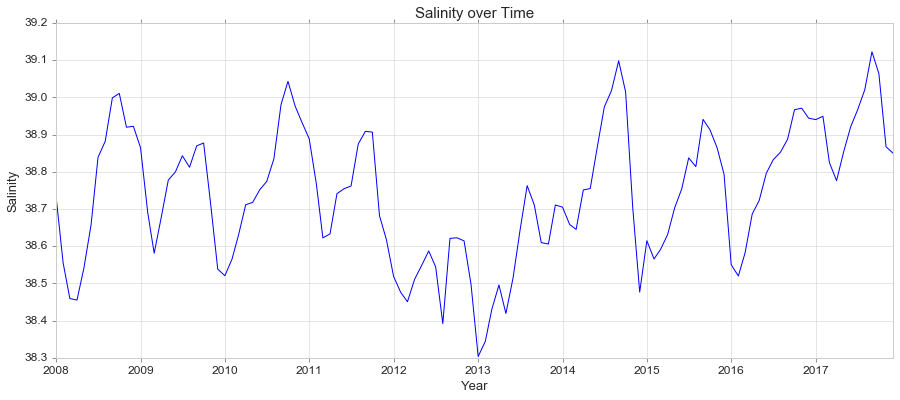

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data['year_month'], data['salinity_surface'] )

ax.set_title('Salinity over Time', fontsize = 15, loc='center')
ax.set_xlabel('Year', fontsize = 13)
ax.set_ylabel('Salinity', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

The monthly data show strong seasonality within each year. There is no cyclic behavior and not trend.

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. 

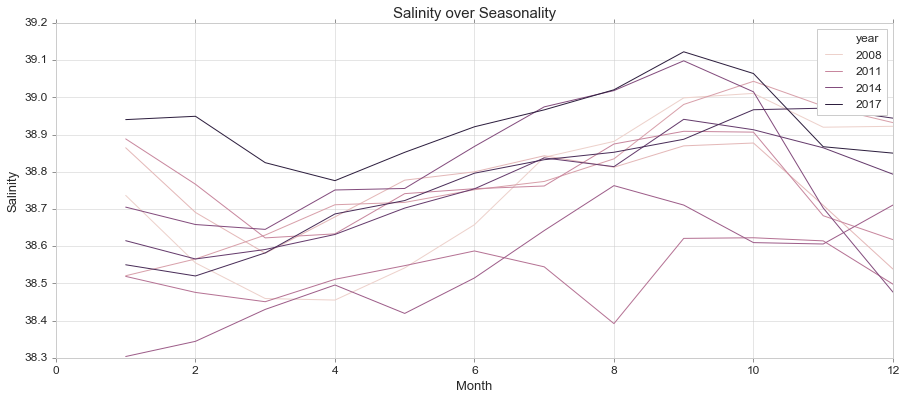

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data['month'], data['salinity_surface'], hue=data['year'])

ax.set_title('Salinity over Seasonality', fontsize = 15, loc='center')
ax.set_xlabel('Month', fontsize = 13)
ax.set_ylabel('Salinity', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

We can clearly see that September is the month with highest salinity.

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.89947288, 0.90788851, 0.91630474, 0.92471322, 0.93310787,
        0.94149433, 0.94988793, 0.95825405, 0.96660814, 0.9749666 ,
        0.98331427, 0.9916405 , 1.        , 0.9916405 , 0.98331427,
        0.9749666 , 0.96660814, 0.95825405, 0.94988793, 0.94149433,
        0.93310787, 0.92471322, 0.91630474, 0.90788851, 0.89947288]),
 <matplotlib.lines.Line2D at 0x1e6452b97f0>)

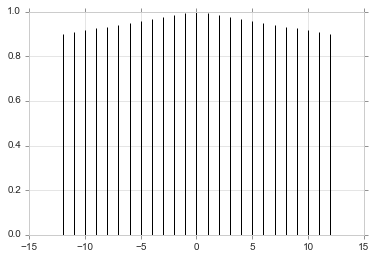

In [32]:
plt.acorr(data['salinity_surface'], maxlags=12)

### Simple forecasting methods

#### Average method
Here, the forecasts of all future values are equal to the mean of the historical data.

#### Naïve method
For naïve forecasts, we simply set all forecasts to be the value of the last observation.

#### Seasonal naïve method
In this case, we set each forecast to be equal to the last observed value from the same season of the year.

#### Drift method
A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data.